In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import plotly.express as px

In [2]:
df = pd.read_csv("Passenger_Cars_Sales.csv")
df.head()

Country 2005 Sales 2006 Sales 2007 Sales 2008 Sales  2009 Sales  \
0    China  3,971,101  5,175,961  6,297,538  6,755,609  10,331,315   
1    India  1,106,863  1,311,373  1,511,812  1,545,414   1,816,878   
2    Japan  4,748,482  4,612,318  4,325,508  4,184,266   3,905,310   
3      USA  7,659,983  7,761,592  7,562,334  6,769,107   5,400,890   
4  Germany  3,319,259  3,467,961  3,148,163  3,090,040   3,807,175   

   2010 Sales  2011 Sales  2012 Sales  2013 Sales  2014 Sales  2015 Sales  \
0  13,757,794  14,472,416  15,495,240  17,927,730  19,707,677  21,210,339   
1   2,387,197   2,510,313   2,781,919   2,553,979   2,570,736   2,772,270   
2   4,203,181   3,509,036   4,572,333   4,562,282   4,699,591   4,215,889   
3   5,635,432   6,089,403   7,241,900   7,585,341   7,749,432   7,516,826   
4   2,916,259   3,173,634   3,082,504   2,952,431   3,036,773   3,206,042   

   2016 Sales  2017 Sales  2018 Sales  2019 Sales  2020 Sales  2021 Sales  \
0  24,376,902  24,718,321  23,709,782  21,472,092  20,177,731  21,481,537   
1   2,966,637   3,229,109   3,394,756   2,962,115   2,433,464   3,082,279   
2   4,146,459   4,386,378   4,391,160   4,301,091   3,809,977   3,675,698   
3   6,872,729   6,080,229   5,303,580   4,719,710   3,401,838   3,350,050   
4   3,351,607   3,441,262   3,435,778   3,607,258   2,917,678   2,622,132   

   2022 Sales  
0  23,563,287  
1   3,792,356  
2   3,448,297  
3   2,858,575  
4   2,651,357

In [3]:
country_names = df['Country'].unique()
total_countries = df['Country'].count()

print("Total Countries are: ", total_countries)
print(country_names)

Total Countries are:  141
['China' 'India' 'Japan' 'USA' 'Germany' 'UK' 'Brazil' 'France'
 'South Korea' 'Italy' 'Spain' 'Indonesia' 'Australia' 'Russia' 'Turkey'
 'Malaysia' 'Saudi Arabia' 'Mexico' 'Poland' 'Taiwan' 'Belgium'
 'South Africa' 'Thailand' 'Netherlands' 'Chile' 'Sweden' 'Vietnam'
 'Argentina' 'Canada' 'Israel' 'Philippines' 'Switzerland' 'Austria'
 'Colombia' 'Czechia' 'Pakistan' 'Norway' 'UA Emirates' 'Portugal'
 'Uzbekistan' 'Denmark' 'Morocco' 'Egypt' 'Romania' 'Peru' 'New Zealand'
 'Hungary' 'Greece' 'Ireland' 'Ecuador' 'Kazakhstan' 'Kuwait' 'Finland'
 'Slovakia' 'Croatia' 'Ukraine' 'Bulgaria' 'Albania' 'Algeria' 'Angola'
 'Armenia' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Belarus'
 'Belize' 'Bolivia' 'Bosnia & Herz.' 'Botswana' 'Brunei' 'Burkina Faso'
 'Burma' 'Burundi' 'Cambodia' 'Cameroon' 'Costa Rica' 'Cuba' 'Cyprus'
 'Domin. Rep.' 'DR Congo' 'El Salvador' 'Estonia' 'Gabon' 'Georgia'
 'Ghana' 'Guatemala' 'Guyana' 'Honduras' 'Hong Kong' 'Iceland' 'Iran'
 'Ira

In [4]:
year_sales = df.columns[1:]
year_sales

Index(['2005 Sales', '2006 Sales', '2007 Sales', '2008 Sales', '2009 Sales',
       '2010 Sales', '2011 Sales', '2012 Sales', '2013 Sales', '2014 Sales',
       '2015 Sales', '2016 Sales', '2017 Sales', '2018 Sales', '2019 Sales',
       '2020 Sales', '2021 Sales', '2022 Sales'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Country     141 non-null    object
 1   2005 Sales  140 non-null    object
 2   2006 Sales  140 non-null    object
 3   2007 Sales  140 non-null    object
 4   2008 Sales  140 non-null    object
 5   2009 Sales  140 non-null    object
 6   2010 Sales  140 non-null    object
 7   2011 Sales  140 non-null    object
 8   2012 Sales  140 non-null    object
 9   2013 Sales  140 non-null    object
 10  2014 Sales  140 non-null    object
 11  2015 Sales  141 non-null    object
 12  2016 Sales  138 non-null    object
 13  2017 Sales  140 non-null    object
 14  2018 Sales  140 non-null    object
 15  2019 Sales  140 non-null    object
 16  2020 Sales  57 non-null     object
 17  2021 Sales  58 non-null     object
 18  2022 Sales  57 non-null     object
dtypes: object(19)
memory usage: 21.1+ KB


In [6]:
df.isnull().sum()

Country        0
2005 Sales     1
2006 Sales     1
2007 Sales     1
2008 Sales     1
2009 Sales     1
2010 Sales     1
2011 Sales     1
2012 Sales     1
2013 Sales     1
2014 Sales     1
2015 Sales     0
2016 Sales     3
2017 Sales     1
2018 Sales     1
2019 Sales     1
2020 Sales    84
2021 Sales    83
2022 Sales    84
dtype: int64

In [7]:
sales_columns = df.columns[df.columns.str.contains('Sales')]
df[sales_columns] = df[sales_columns].apply(lambda x: x.str.replace(",", "").fillna(0).astype(int))

### Key Performance Indicators (KPIs)

### 1.Total Global Sales: Sum of passenger car sales across all countries for each year.

In [8]:
df[sales_columns].sum()

2005 Sales    45188998
2006 Sales    47749281
2007 Sales    50601797
2008 Sales    49760865
2009 Sales    49439062
2010 Sales    55564655
2011 Sales    57578853
2012 Sales    60622969
2013 Sales    63057347
2014 Sales    65328736
2015 Sales    66277805
2016 Sales    69445053
2017 Sales    70634126
2018 Sales    68626613
2019 Sales    64282316
2020 Sales    52646423
2021 Sales    55390039
2022 Sales    56350482
dtype: int64

### 2. How many Sales happend in Each country from 2005 to 2022

In [9]:
sales_per_country = df[sales_columns].sum(axis=1)
total_sales_by_country_df = pd.DataFrame({'Country': df['Country'], 'Total Sales': sales_per_country})
total_sales_by_country_df

Country  Total Sales
0        China    294602372
1        India     44729470
2        Japan     75697256
3          USA    109558951
4      Germany     57227313
..         ...          ...
136    Uruguay       456758
137  Venezuela      1049741
138      Yemen        39332
139     Zambia        30460
140   Zimbabwe        42432

[141 rows x 2 columns]

### 3. Highest Sales Country From 2005 to 2022

In [10]:
highest_sales_country = total_sales_by_country_df.loc[total_sales_by_country_df['Total Sales'].idxmax()]
    
print("Country with the highest total sales:")
print(highest_sales_country)

Country with the highest total sales:
Country            China
Total Sales    294602372
Name: 0, dtype: object


### 4. Sum of Total Sales from 2005 to 2022

In [11]:
print('Sum of total Sales of all the countries from 2005 to 2022 are', total_sales_by_country_df['Total Sales'].sum())

Sum of total Sales of all the countries from 2005 to 2022 are 1048545420


### 5. Top Selling Countries: Identifying countries with the highest sales volume annually.

In [12]:
for col in sales_columns:    
    top_5_sales_countries = df[['Country', col]].nlargest(5, col)
    
    fig = px.bar(top_5_sales_countries, x='Country', y=col,
                title=f'Top 5 Sales Country in {col}', color='Country')

    fig.update_layout(
        xaxis_title='Country',
        yaxis_title='Number of Sales',
        legend_title_text='Countries',
        showlegend=True,
        bargap=0.05,
        plot_bgcolor='white',
        xaxis=dict(showgrid=False),
        yaxis=dict(showgrid=False)
    )

    fig.show()
    
    print(f"Top 5 selling countries in {col}:")
    
    for idx, row in top_5_sales_countries.iterrows():    
        print(f"{row['Country']}: {row[col]}")
        
    print()

Top 5 selling countries in 2005 Sales:
USA: 7659983
Japan: 4748482
China: 3971101
Germany: 3319259
UK: 2439717



Top 5 selling countries in 2006 Sales:
USA: 7761592
China: 5175961
Japan: 4612318
Germany: 3467961
UK: 2344864



Top 5 selling countries in 2007 Sales:
USA: 7562334
China: 6297538
Japan: 4325508
Germany: 3148163
Russia: 2514920



Top 5 selling countries in 2008 Sales:
USA: 6769107
China: 6755609
Japan: 4184266
Germany: 3090040
Russia: 2897459



Top 5 selling countries in 2009 Sales:
China: 10331315
USA: 5400890
Japan: 3905310
Germany: 3807175
Brazil: 2643862



Top 5 selling countries in 2010 Sales:
China: 13757794
USA: 5635432
Japan: 4203181
Germany: 2916259
Brazil: 2856540



Top 5 selling countries in 2011 Sales:
China: 14472416
USA: 6089403
Japan: 3509036
Germany: 3173634
Brazil: 2901647



Top 5 selling countries in 2012 Sales:
China: 15495240
USA: 7241900
Japan: 4572333
Brazil: 3115223
Germany: 3082504



Top 5 selling countries in 2013 Sales:
China: 17927730
USA: 7585341
Japan: 4562282
Brazil: 3040783
Germany: 2952431



Top 5 selling countries in 2014 Sales:
China: 19707677
USA: 7749432
Japan: 4699591
Germany: 3036773
Brazil: 2794687



Top 5 selling countries in 2015 Sales:
China: 21210339
USA: 7516826
Japan: 4215889
Germany: 3206042
India: 2772270



Top 5 selling countries in 2016 Sales:
China: 24376902
USA: 6872729
Japan: 4146459
Germany: 3351607
India: 2966637



Top 5 selling countries in 2017 Sales:
China: 24718321
USA: 6080229
Japan: 4386378
Germany: 3441262
India: 3229109



Top 5 selling countries in 2018 Sales:
China: 23709782
USA: 5303580
Japan: 4391160
Germany: 3435778
India: 3394756



Top 5 selling countries in 2019 Sales:
China: 21472092
USA: 4719710
Japan: 4301091
Germany: 3607258
India: 2962115



Top 5 selling countries in 2020 Sales:
China: 20177731
Japan: 3809977
USA: 3401838
Germany: 2917678
India: 2433464



Top 5 selling countries in 2021 Sales:
China: 21481537
Japan: 3675698
USA: 3350050
India: 3082279
Germany: 2622132



Top 5 selling countries in 2022 Sales:
China: 23563287
India: 3792356
Japan: 3448297
USA: 2858575
Germany: 2651357



### Insights

1. In 2005, 2006, 2007, 2008 the 'USA' was the highest Sales Country with aleast 7 million sales.

2. 'China' had 6.7 million sales in 2008 but still was second highest sales country.

3. But in 2009 the 'China' sales increased sharply to 10 million and became the highest Pessanger cars sales country.
    
4. 2009 to 2022 sales of 'China' increased from 10 million and lies between 10 million to 25 million.

5. 2009 to 2019 'USA' was the second highest Pessanger cars Sales country with 4 to 7 million sales. But from 2020 the 'USA' 
   sales decreased and other countries 'Japan' and 'India' became the second highest sales country over time.

6. Overall the 'USA', 'Japan', 'Germeny' countries was in top 5 but sales decreased overtime in these countries.

7. 'China' has overall the highest sales.

In [13]:
china_sales = df[df['Country'] == 'China'].squeeze()
china_sales = china_sales.drop('Country')
china_sales_df = pd.DataFrame({'Year': china_sales.index, 'Sales': china_sales.values})

fig = px.line(china_sales_df, x='Year', y='Sales', title='Sales Over Time in China')
fig.update_layout(
    plot_bgcolor='white',
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False)
)
fig.show()

### 6. Sales Growth Rate: Calculating the percentage increase or decrease in sales compared to the previous year.

In [14]:
Sales_Growth = pd.DataFrame(df['Country'])

for i in range(1, len(sales_columns)):
    current_year_sales_col = sales_columns[i]
    previous_year_sales_col = sales_columns[i - 1]
    
    Sales_Growth[f'{current_year_sales_col} Growth'] = round((((df[current_year_sales_col] - df[previous_year_sales_col]) / df[previous_year_sales_col]) * 100), 2)

In [15]:
Sales_Growth.head()

Country  2006 Sales Growth  2007 Sales Growth  2008 Sales Growth  \
0    China              30.34              21.67               7.27   
1    India              18.48              15.28               2.22   
2    Japan              -2.87              -6.22              -3.27   
3      USA               1.33              -2.57             -10.49   
4  Germany               4.48              -9.22              -1.85   

   2009 Sales Growth  2010 Sales Growth  2011 Sales Growth  2012 Sales Growth  \
0              52.93              33.17               5.19               7.07   
1              17.57              31.39               5.16              10.82   
2              -6.67               7.63             -16.51              30.30   
3             -20.21               4.34               8.06              18.93   
4              23.21             -23.40               8.83              -2.87   

   2013 Sales Growth  2014 Sales Growth  2015 Sales Growth  2016 Sales Growth  \
0              15.70               9.93               7.62              14.93   
1              -8.19               0.66               7.84               7.01   
2              -0.22               3.01             -10.29              -1.65   
3               4.74               2.16              -3.00              -8.57   
4              -4.22               2.86               5.57               4.54   

   2017 Sales Growth  2018 Sales Growth  2019 Sales Growth  2020 Sales Growth  \
0               1.40              -4.08              -9.44              -6.03   
1               8.85               5.13             -12.74             -17.85   
2               5.79               0.11              -2.05             -11.42   
3             -11.53             -12.77             -11.01             -27.92   
4               2.67              -0.16               4.99             -19.12   

   2021 Sales Growth  2022 Sales Growth  
0               6.46               9.69  
1              26.66              23.04  
2              -3.52              -6.19  
3              -1.52             -14.67  
4             -10.13               1.11

In [16]:
countries = ['China', 'USA']

for country in countries:
    sales_country = Sales_Growth[Sales_Growth['Country'] == country].squeeze()
    sales_country = sales_country.drop('Country')
    sales_country_df = pd.DataFrame({'Year': sales_country.index, 'Sales': sales_country.values})

    fig = px.line(sales_country_df, x='Year', y='Sales', title=f'Sales Growth Rate in {country}')
    fig.update_layout(
        plot_bgcolor='white',
        xaxis=dict(showgrid=False),
        yaxis=dict(showgrid=False)
    )
    fig.show()

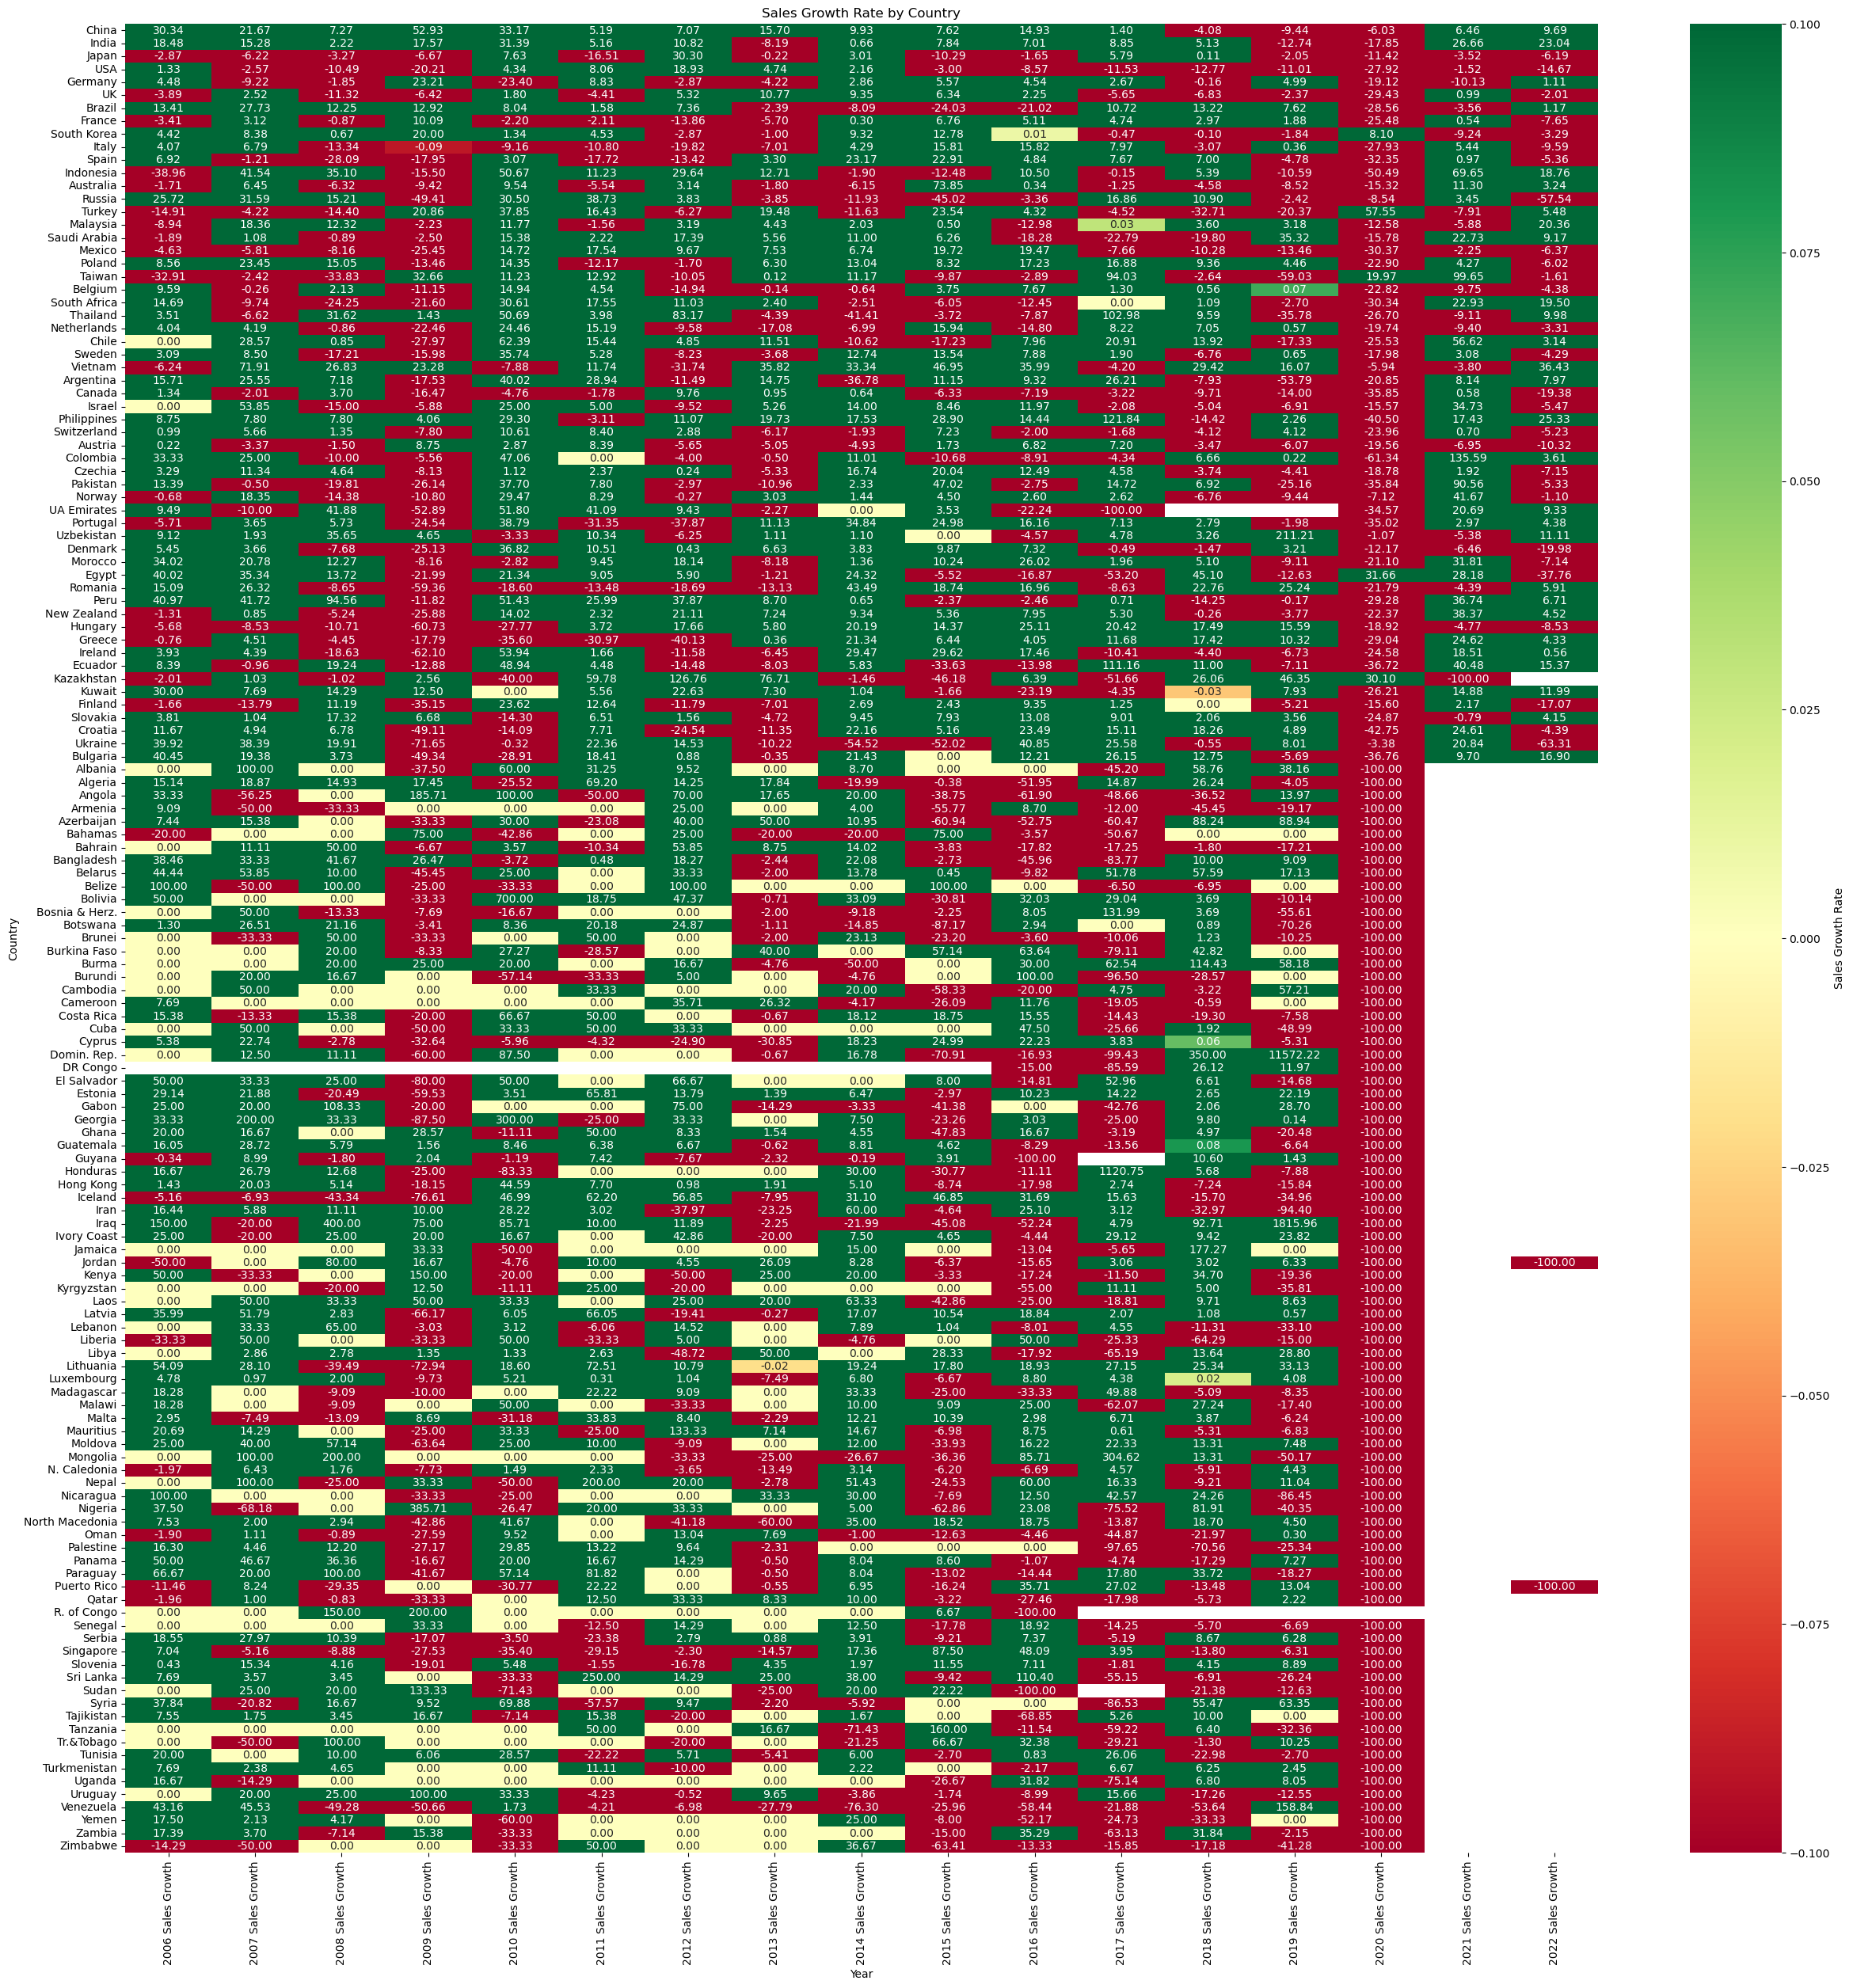

In [17]:
plt.figure(figsize=(30, 30))
sb.heatmap(Sales_Growth.set_index('Country')[[col for col in Sales_Growth.columns if 'Growth' in col]],
            cmap='RdYlGn', annot=True, fmt=".2f", cbar_kws={'label': 'Sales Growth Rate'})
plt.title('Sales Growth Rate by Country')
plt.xlabel('Year')
plt.ylabel('Country')
plt.show()

### 7. Regional Market Share: Analyzing the proportion of sales contributed by each continent or region.

In [18]:
Regional_market_share = pd.DataFrame(df['Country'])

for col in sales_columns:
    Regional_market_share[f'{col} Market Shares'] = round(((df[col] / df[col].sum()) * 100), 2)
Regional_market_share.head()

Country  2005 Sales Market Shares  2006 Sales Market Shares  \
0    China                      8.79                     10.84   
1    India                      2.45                      2.75   
2    Japan                     10.51                      9.66   
3      USA                     16.95                     16.25   
4  Germany                      7.35                      7.26   

   2007 Sales Market Shares  2008 Sales Market Shares  \
0                     12.45                     13.58   
1                      2.99                      3.11   
2                      8.55                      8.41   
3                     14.94                     13.60   
4                      6.22                      6.21   

   2009 Sales Market Shares  2010 Sales Market Shares  \
0                     20.90                     24.76   
1                      3.67                      4.30   
2                      7.90                      7.56   
3                     10.92                     10.14   
4                      7.70                      5.25   

   2011 Sales Market Shares  2012 Sales Market Shares  \
0                     25.13                     25.56   
1                      4.36                      4.59   
2                      6.09                      7.54   
3                     10.58                     11.95   
4                      5.51                      5.08   

   2013 Sales Market Shares  2014 Sales Market Shares  \
0                     28.43                     30.17   
1                      4.05                      3.94   
2                      7.24                      7.19   
3                     12.03                     11.86   
4                      4.68                      4.65   

   2015 Sales Market Shares  2016 Sales Market Shares  \
0                     32.00                     35.10   
1                      4.18                      4.27   
2                      6.36                      5.97   
3                     11.34                      9.90   
4                      4.84                      4.83   

   2017 Sales Market Shares  2018 Sales Market Shares  \
0                     34.99                     34.55   
1                      4.57                      4.95   
2                      6.21                      6.40   
3                      8.61                      7.73   
4                      4.87                      5.01   

   2019 Sales Market Shares  2020 Sales Market Shares  \
0                     33.40                     38.33   
1                      4.61                      4.62   
2                      6.69                      7.24   
3                      7.34                      6.46   
4                      5.61                      5.54   

   2021 Sales Market Shares  2022 Sales Market Shares  
0                     38.78                     41.82  
1                      5.56                      6.73  
2                      6.64                      6.12  
3                      6.05                      5.07  
4                      4.73                      4.71

In [19]:
countries = ['China', 'USA']

for country in countries:
    sales_country = Regional_market_share[Regional_market_share['Country'] == country].squeeze()
    sales_country = sales_country.drop('Country')
    sales_country_df = pd.DataFrame({'Year': sales_country.index, 'Sales Market Shares': sales_country.values})

    fig = px.line(sales_country_df, x='Year', y='Sales Market Shares', title=f'Market Shares in {country}')
    fig.update_layout(
        plot_bgcolor='white',
        xaxis=dict(showgrid=False),
        yaxis=dict(showgrid=False)
    )
    fig.show()

1. 'China' Market shares increased from 8.79 to 41.82.
2. 'USA' Market shares descreased from 16.65 to 6.05.

### Sales Distribution: distribution of sales across different Years.

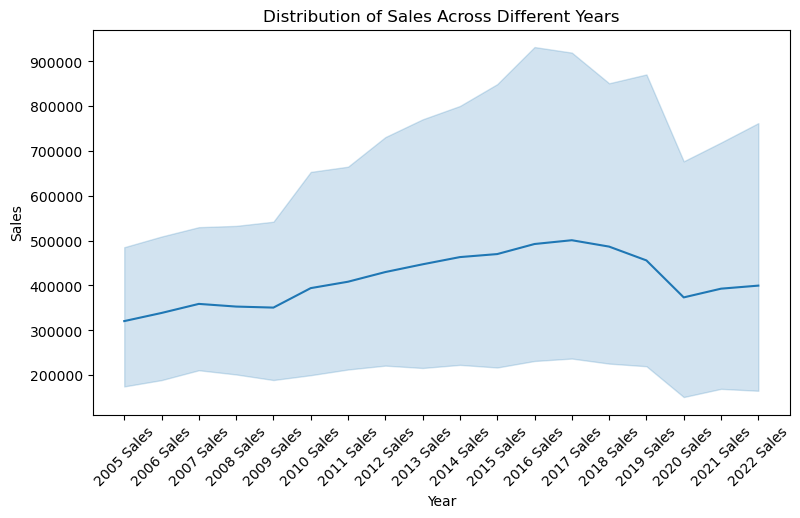

In [20]:
sales_data = df.melt(id_vars='Country', var_name='Year', value_name='Sales')

plt.figure(figsize=(9, 5))
sb.lineplot(data=sales_data, x='Year', y='Sales')
plt.title('Distribution of Sales Across Different Years')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

In [21]:
df_sales = df.melt(id_vars='Country', var_name='Year', value_name='Sales')

fig = px.scatter(df_sales, x='Country', y='Sales', color='Year',
                 title='Sales in Each Country Each Year',
                 labels={'Country': 'Country', 'Sales': 'Sales', 'Year': 'Year'})

fig.update_layout(
    xaxis_title='Country',
    yaxis_title='Sales',
    legend_title_text='Year',
    showlegend=True,
    plot_bgcolor='white',
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False)
)

fig.show()

In [22]:
df['Country'][0]

'China'

In [25]:
df['2005 Sales'].sum()

45188998

In [26]:
df[sales_columns].sum().sum()

1048545420

In [27]:
df[df['Country'] == 'China'][['2005 Sales']]

2005 Sales
0     3971101

In [33]:
df_melted = df.melt(id_vars='Country', var_name='Year', value_name='Sales')

heatmap_fig = px.imshow(df_melted.pivot(index='Country', columns='Year', values='Sales'),
                        labels=dict(x="Year", y="Country", color="Sales"),
                        color_continuous_scale='YlGnBu')
heatmap_fig.update_layout(title='Sales Intensity Across Countries and Years',
                           xaxis_title='Year',
                           yaxis_title='Country')
heatmap_fig.show()

In [43]:
continent_sales_top5 = continent_sales.sort_values(by='Sales', ascending=False).head(5)

pie_fig_top5 = px.pie(continent_sales_top5, names='Country', values='Sales', 
                      title='Top 5 Countries by Sales')
pie_fig_top5.show()

In [49]:
scatter_fig = px.scatter(df_melted, x='Year', y='Sales', color='Country',
                         title='Passenger Car Sales Over the Years',
                         labels={'Year': 'Year', 'Sales': 'Sales'},
                         hover_name='Country')
scatter_fig.show()